<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Открытие-файлов-с-данными-и-изучение-общей-информации" data-toc-modified-id="Шаг-1.-Открытие-файлов-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Открытие файлов с данными и изучение общей информации</a></span></li><li><span><a href="#Шаг-2.-Объединяем-таблицы" data-toc-modified-id="Шаг-2.-Объединяем-таблицы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Объединяем таблицы</a></span></li><li><span><a href="#Шаг-3.-Предобработка-данных" data-toc-modified-id="Шаг-3.-Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li></ul></li><li><span><a href="#Шаг-4.-Добавляем-столбцы" data-toc-modified-id="Шаг-4.-Добавляем-столбцы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Добавляем столбцы</a></span></li><li><span><a href="#Шаг-5.-Считаем-выручку" data-toc-modified-id="Шаг-5.-Считаем-выручку-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Считаем выручку</a></span></li><li><span><a href="#Шаг-6.-Анализ-данных" data-toc-modified-id="Шаг-6.-Анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Анализ данных</a></span></li><li><span><a href="#Шаг-7.-Проверка-гипотез" data-toc-modified-id="Шаг-7.-Проверка-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Шаг 7. Проверка гипотез</a></span></li></ul></div>

# Исследование эффективности тарифных планов

«Мегалайн» — федерального оператора сотовой связи. У Мегалайна существует два тарифных плана: «Смарт» и «Ультра». Задача состоит в том чтобы определить какой тариф приносит больше прибыли компании. 
В работе необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: информация о пользователях, каким тарифом пользуются и какие действия совершали за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов

* Тариф «Смарт»
Ежемесячная плата: 550 рублей,
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.
* Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля,
сообщение: 3 рубля,
1 Гб интернет-трафика: 200 рублей.

* Тариф «Ультра»
Ежемесячная плата: 1950 рублей,
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.
* Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль,
сообщение: 1 рубль,
1 Гб интернет-трафика: 150 рублей.

## Шаг 1. Открытие файлов с данными и изучение общей информации

Первым делом импортируем необходимые библиотеки.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
from scipy import stats as st
from termcolor import colored 

Переходим к нашим таблицам. У нас их много, будем объеденять их с помощью метода merge.

Начнем с чтения файла с данными о звонках клиентов и выведем первые пять строк таблицы.

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение в df_calls
df_calls.head() # получение первых пяти строк таблицы df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Округлим значение звонков в столбце duration.

In [3]:
df_calls['duration'] = np.ceil(df_calls['duration']) # округляем длительность звонков
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


Успех, далее поработаем с информацией по интернету.

In [4]:
df_internet = pd.read_csv('/datasets/internet.csv') # чтение файла с данными и сохранение в df_internet
df_internet.head(2) # получение первых пяти строк таблицы df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000


Далее проведем необходимую работу с датафреймом: изменим тип данных, сделаем столбец с месяцем пользования, сделааем новую таблицу где у каждого пользователя будет отображаться его использования интернета по месяцам и избавимся от мультииндекса. Эти шаги необходимы для дальнейшего соединения всех датафреймов.

In [5]:
df_internet['session_date'] = df_internet['session_date'].astype('datetime64') # изменение типа данных
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month # создание столбца с месяцем
user_inet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['count', 'sum']) # создание сводной таблицы
user_inet.columns = ['count_inet_used', 'sum_mb_used'] # избавляемся от мультииндекса
user_inet = user_inet.reset_index()

Проверим, что получилось в таблице user_name, выведем первые 10 строк.

In [6]:
user_inet.head(10) # вывод первых 10 строк

,user_id,month,count_inet_used,sum_mb_used
0,1000,5,5,2253.49
1,1000,6,49,23233.77
2,1000,7,29,14003.64
3,1000,8,29,14055.93
4,1000,9,27,14568.91
5,1000,10,27,14702.49
6,1000,11,24,14756.47
7,1000,12,21,9817.61
8,1001,11,55,18429.34
9,1001,12,41,14036.66


Отлично все данные на месте: информация о конкретном пользователе, месяце, интернет сессиях и сумме трафика.

Идем далее и посмотрим информацию о смс сообщениях пользователей, проделаем аналогичные шаги, как с предыдущими датафреймами.

In [7]:
df_messages = pd.read_csv('/datasets/messages.csv') # чтение файла с данными и сохранение в df_messages
df_messages.head() # получение первых пяти строк таблицы df_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Сделаем шаги которые делали ранее: изменим тип данных, сделаем столбец с месяцем пользования, сделааем новую таблицу где у каждого пользователя будет отображаться его количество смс по месяцам и избавимся от мультииндекса.

In [8]:
df_messages['message_date'] = df_messages['message_date'].astype('datetime64') # изменение типа данных
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month # создание столбца с месяцем
user_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count']) # создание сводной таблицы
user_messages.columns = ['sum_messages'] # изменение названия столбца
user_messages.reset_index()
user_messages.head()

sum_messages
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57

Успех все необходимое на своем месте. Далее посмотрим на таблицу с нашими тарифами. 

In [9]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv') # чтение файла с данными и сохранение в df_tariffs
df_tariffs # получение строк таблицы df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице df_tariffs две строки с информацией о тарифах smart и ultra. Далее мы будем соединять таблицы в общую и будем использовать для этого столбцы user_id и tariff.

In [10]:
df_users = pd.read_csv('/datasets/users.csv') # чтение файла с данными и сохранение в df_users
df_users['churn_date'] = df_users['churn_date'].astype('datetime64') # замена типа данных столбца churn_date
df_users.head() # получение первых пяти строк таблицы df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Поработаем с типами данных заменим типы для дальнейшей работы с данными.

In [11]:
df_calls['call_date'] = df_calls['call_date'].astype('datetime64') # замена типа данных столбца call_date
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month # создание столбца month
user_call = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']) 
user_call.columns = ['count_call', 'sum_call_minute'] # избавляемся от мультииндекса
user_call = user_call.reset_index()
user_call.head()

,user_id,month,count_call,sum_call_minute
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


В данной таблице есть информация о сумме звонков, длительности звонков по месяцам, то что нужно, будем соеденять по месяцу и айди юзера.

**Вывод:**

В данном шаге мы импортировали библиотеки и открывали таблицы с необходимыми данными. Таблиц всего 5 штук: информация о звонках, о интернет трафике, основная информация о пользователях, смс сообщениях и о самих тарифах. В следующем шаге будем их объеденять в один общий датафрейм.

## Шаг 2. Объединяем таблицы

Будем объединять таблицы с помощью метода merge. Объединять таблицы по столбцам user_id и month. Сделаем общий датафрейм total_df.

In [12]:
total_df = user_call.merge(user_inet, on=['user_id', 'month'], how='outer') # объеденяем таблицы df_users и user_call
total_df = total_df.merge(user_messages, on=['user_id', 'month'], how='outer')
total_df = total_df.merge(df_users, on='user_id', how='outer')

total_df.shape

(3216, 14)

Чтобы объединить таблицу df_tariffs с total_df необходимо поменять название столбца tariff на tariff_name именно по этому столбцу будем объединять наши датасеты.

In [13]:
total_df = total_df.rename(columns={'tariff':'tariff_name'}) # переименование столбца 
total_df = total_df.merge(df_tariffs, on='tariff_name', how='left')

total_df.shape

(3216, 21)

In [14]:
total_df.head(2)

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,...,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,5.0,2253.49,22.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,49.0,23233.77,60.0,52,NaT,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Все мы объединили таблицы, осталось посмотреть на общие данные и сделать выводы по ним.

Сделаем видимыми все столбцы датафрейма:

In [15]:
pd.set_option('display.max_columns', None) # делаем все столбцы видимыми

In [16]:
total_df.head(2)

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,5.0,2253.49,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,49.0,23233.77,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [17]:
total_df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   count_call             3174 non-null   float64       
 3   sum_call_minute        3174 non-null   float64       
 4   count_inet_used        3203 non-null   float64       
 5   sum_mb_used            3203 non-null   float64       
 6   sum_messages           2717 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   object        
 13  tar

Итак, в таблице двадцать один столбец. Тип данных в столбцах: object, int64, float64.

Согласно документации к данным:

* user_id — уникальный идентификатор пользователя; 
* age — возраст пользователя (годы); 
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных); 
* city — город проживания пользователя; 
* first_name — имя пользователя; 
* last_name — фамилия пользователя; 
* reg_date — дата регистрации пользователя; 
* tariff_name — тариф; 
* month — месяц; 
* count_call — количество звонков; 
* sum_call — сумма минут звонков; 
* count_inet_used — количество интернет сессий пользователя; 
* sum_mb_used — сумма использованого интернет трафика; 
* sum_messages — количество отправленных сообщений;
* rub_monthly_fee - ежемесячная абонентская плата в рублях;
* messages_included -  количество сообщений в месяц, включённых в абонентскую плату;
* rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта);
* rub_per_message - стоимость отправки сообщения сверх тарифного пакета ;
* rub_per_minute - стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* mb_per_month_included - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах).



В названиях колонок отсутствуют нарушения стиля.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод:**

На данном шаге мы объединили 5 таблиц в одну под названием total_df. В таблице total_df образовался 21 столбец с необходимой нам информацией этого будет достаточно для дальнейших действий. На следующем шаге мы будем работать с самим качеством данных.

## Шаг 3. Предобработка данных

###  Обработка пропусков

Посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [18]:
total_df.isna().sum() # смотрим количество пропусков в total_df

user_id                     0
month                       2
count_call                 42
sum_call_minute            42
count_inet_used            13
sum_mb_used                13
sum_messages              499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Посмотрим на пропуски столбца month в total_df.

In [19]:
total_df[total_df['month'].isna()] # смотрим пропуски в столбце month 

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Видно, что два пользователя недолго пользовались услугами связи это user_id 1128 и user_id 1371. Обработаем пропуски этих пользователей. Они пользовались услугами в декабре, заменеим пропуски в столбце month на 12 (декабрь).

In [20]:
total_df['month'] = total_df['month'].fillna(12)

In [21]:
total_df.query('user_id == 1128 or user_id == 1371')

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,12.0,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,12.0,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [22]:
df_december = total_df.query('month == 12')

In [23]:
df_isna = df_december.groupby('age')[['count_call', 'sum_call_minute', 'count_inet_used', 'sum_mb_used', 'sum_messages']].median()
df_isna.query('age == 50 or age == 51')

,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages
age,,,,,
50,54.0,383.0,47.0,17155.755,41.0
51,70.0,490.5,55.0,20139.605,72.0


Сделаем замены пропущенных значений в столбцах, где user_id равен 1371, значения будут заменены на результат группировки по годам пользователей и использованию услуг пользователей в декабре, значение использования будет медианой этих групп. Учтем, что пользователь был клиентом всего 5 дней, относительно декабря это примерно 16 % от месяца, используем это в расчете пропусков.

In [24]:
total_df.loc[(total_df.user_id == 1371), 
             ['count_call', 'sum_call_minute', 'count_inet_used', 'sum_mb_used', 'sum_messages']] = np.ceil([54 * 0.16, 383 * 0.16, 47 * 0.16, 17155.755 * 0.16, 41 * 0.16])

In [25]:
total_df.query('user_id == 1371')

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3215,1371,12.0,9.0,62.0,8.0,2745.0,7.0,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


Теперь cделаем замены пропущенных значений в столбцах, где user_id равен 1128, произведем замену аналогично процессу замен по user_id 1371, но будем учитывать, что юзер пользовался услугами 8 дней, относительно декабря это примерно 26 % от месяца, используем это в расчете пропусков.

In [26]:
total_df.loc[(total_df.user_id == 1128), 
             ['count_call', 'sum_call_minute', 'count_inet_used', 'sum_mb_used', 'sum_messages']] = np.ceil([70 * 0.26, 490 * 0.26, 55 * 0.26, 20139.605 * 0.26, 72 * 0.26])

In [27]:
total_df.query('user_id == 1128')

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3214,1128,12.0,19.0,128.0,15.0,5237.0,19.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


In [28]:
total_df.isna().sum() 

user_id                     0
month                       0
count_call                 40
sum_call_minute            40
count_inet_used            11
sum_mb_used                11
sum_messages              497
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

По поводу остальных пропусков, я думаю, что некоторые люди пользовались, какими либо услугами, а какие то не использовали, например смс. На моем опыте мало кто из молодых людей пользуется смс сообщениями, также пропуски с использованием интерента совпадают (столбцы count_inet_used и sum_mb_used) пропуски в 11 строках. Логически можно заменить нулем, что мы и сделаем.

In [29]:
total_df[['count_inet_used','sum_mb_used','sum_messages','count_call','sum_call_minute']] = total_df[['count_inet_used','sum_mb_used','sum_messages','count_call','sum_call_minute']].fillna(0) # заполняем пропуски нулем

От важных пропусков мы избавились, столбец churn_date имеет пропуски так как пользователи не прекращали испоьзовать свои тарифы.

**Вывод:**

В данном этапе мы отработали все пропуски. У пользователей с пропусками было замечено, что они пользовались связью около недели и мы их дропнули, остальные пропуски мы заменили логически. Также в total_df остались пропуски в столбце churn_date это нормально ведь пользователи до сих пор используют услуги связи.

### Замена типа данных

Для дальнейшей работы необходимо заменить тип данных.

In [30]:
total_df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   float64       
 2   count_call             3216 non-null   float64       
 3   sum_call_minute        3216 non-null   float64       
 4   count_inet_used        3216 non-null   float64       
 5   sum_mb_used            3216 non-null   float64       
 6   sum_messages           3216 non-null   float64       
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   object        
 13  tar

Заменим тип данных сиолбцов с флотами на int64. Убрав дробные части мы ничего существенного для анализа не потеряем, зато с типом данных int64 мы получим точные данные, так как данные типа float64 хранятся не точно, а лишь с некоторым приближением, иногда это может приводить к багам.

In [31]:
total_df = total_df.astype(
    {'month':'int','count_call':'int','sum_call_minute':'int','count_inet_used':'int','sum_mb_used':'int', 'sum_messages':'int'}) # меняем тип данных

In [32]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3216 non-null   int64         
 2   count_call             3216 non-null   int64         
 3   sum_call_minute        3216 non-null   int64         
 4   count_inet_used        3216 non-null   int64         
 5   sum_mb_used            3216 non-null   int64         
 6   sum_messages           3216 non-null   int64         
 7   age                    3216 non-null   int64         
 8   churn_date             189 non-null    datetime64[ns]
 9   city                   3216 non-null   object        
 10  first_name             3216 non-null   object        
 11  last_name              3216 non-null   object        
 12  reg_date               3216 non-null   object        
 13  tar

Также посмотрим есть ли дубликаты в наших данных.

In [33]:
total_df[total_df.duplicated()]

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


Успех замена типа данных прошла успешно, идем далее в следующем шаге мы будем добавлять необходимые для решения задач столбцы с данными. Также отмечу, что в данных нет дубликатов.

## Шаг 4. Добавляем столбцы

Для дальнейшего анализа необходимо сделать столбцы с трафиком пользователей в GB и перевести в гигабайты в мегабайты это необходимо для расчета выручки.

In [34]:
total_df['sum_gb_used'] = total_df['sum_mb_used'] / 1024 # добавляем столбец с информцией о трафике в GB
total_df['sum_gb_used'] = total_df['sum_gb_used'].apply(np.ceil) # округляем значения
total_df['sum_gb_used'] = total_df['sum_gb_used'].astype('int') # меняем тип данных

In [35]:
total_df.head(2)

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used
0,1000,5,22,159,5,2253,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,3
1,1000,6,43,172,49,23233,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,23


Успех, займемся столбцом sum_gb_included в котором содержится информация об объёме интернет-трафика, включённого в абонентскую плату. 

In [36]:
total_df['sum_gb_included'] = total_df['mb_per_month_included'] / 1024 # добавляем столбец с информцией о включеном в тариф трафике в GB
total_df['sum_gb_included'] = total_df['sum_gb_included'].astype('int') # меняем тип данных

In [37]:
total_df.head(2)

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,sum_gb_included
0,1000,5,22,159,5,2253,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,3,30
1,1000,6,43,172,49,23233,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,23,30


Столбец добавлен, следующий шаг расчет выручки.

**Вывод:**

На этом этапе мы добавили столбцы sum_gb_used и sum_gb_included для того, чтобы считать выручку по тарифу Ультра и Смарт.

## Шаг 5. Считаем выручку

На данном этапе необходимо посчитать выручку всех абонентов и создать отдельный столбец с информацией о выручке каждого пользователя по месяцам. Для подсчета выручки нужно написать функцию. 

In [38]:
def revenue(row): # функция которая подсчитывает выручку 
    
    if row['sum_call_minute'] > row['minutes_included']:  
        call_up = (row['sum_call_minute'] - row['minutes_included']) * row['rub_per_minute']
    else: call_up = 0
        
    if row['sum_messages'] > row['messages_included']:  
        messages_up = (row['sum_messages'] - row['messages_included']) * row['rub_per_message']
    else: messages_up = 0

    if row['sum_gb_used'] > row['sum_gb_included']: 
        inet_up = (row['sum_gb_used'] - row['sum_gb_included']) * row['rub_per_gb']
    else: inet_up = 0
    
    return (call_up + messages_up + inet_up + row['rub_monthly_fee'])

Функция написана, создадим столбец revenue_per_month и применим нашу функцию к общей таблице с помощью метода apply.

In [39]:
total_df['revenue_per_month'] = total_df.apply(revenue, axis=1) # применяем функцию к total_df и создаем столбец revenue_per_month

In [40]:
# check
total_df['revenue_per_month'].sum()

4916951

Функция успешно применена посмотрим на первые пять строк total_df.

In [41]:
total_df.head() # вывод первых пяти строчек total_df

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,sum_gb_included,revenue_per_month
0,1000,5,22,159,5,2253,22,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,3,30,1950
1,1000,6,43,172,49,23233,60,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,23,30,1950
2,1000,7,47,340,29,14003,75,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14,30,1950
3,1000,8,52,408,29,14055,81,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,14,30,1950
4,1000,9,58,466,27,14568,57,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,15,30,1950


In [42]:
total_df.tail() # вывод последних пяти строчек total_df

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,sum_gb_included,revenue_per_month
3211,1489,10,0,0,63,19559,21,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,20,15,1550
3212,1489,11,0,0,55,17491,20,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,18,15,1150
3213,1489,12,0,0,51,17322,35,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,17,15,950
3214,1128,12,19,128,15,5237,19,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,6,30,1950
3215,1371,12,9,62,8,2745,7,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3,3,15,550


Данные о выручке есть, посмотрим есть ли пропуски в столбце revenue_per_month.

In [43]:
total_df['revenue_per_month'].isna().sum() # проверка пропусков в столбце revenue_per_month

0

Успех функция работает, пропусков в столбце revenue_per_month нет.

**Вывод:**

На данном этапе мы сделали расчет выручки с помощью функции revenue. В функции мы использовали данные пользователей и их действия в течении каждого месяца. Минимальная оплата за тариф Смарт - 550 рублей, минимальная оплата за тариф Ультра - 1950 рублей, уверен, что есть пользователи которые намного превышали минимальную стоимость за услуги и это мы проверим в следующих шагах.

## Шаг 6. Анализ данных

На данном этапе потребуется описать поведение клиентов. Рассмотреть основные данные о пользователях такие как: сколько минут они разговаривали по телефону, какое количество смс сообщений отправляли, какой объем интернет трафика и узнать сколько из всего перечисленного требуется пользователям каждого тарифа в месяц. Также необходимо узнать среднее, дисперсию, стандартное отклонение и построить гистограммы.

Первым делом предлагаю разделить наши данные по двум тарифам, начнем с тарифа Смарт.

**Смарт**

Сделаем таблицу с данными где пользователь использует тариф Смарт.

In [44]:
df_smart = total_df.query('tariff_name == "smart"') # выделяем пользователей тарифа Смарт

In [45]:
df_smart['tariff_name'].value_counts() # подсчет тарифов в df_smart

smart    2230
Name: tariff_name, dtype: int64

Посмотрим на количество пользователей тарифа Смарт.

In [46]:
len(df_smart['user_id'].unique()) # смотрим длинну df_smart

351

351 человек пользуются тарифом Смарт.

In [47]:
df_smart.describe()

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,sum_gb_included,revenue_per_month
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.00000,2230.0,2230.000000
mean,1246.562332,8.348430,58.441256,417.775336,50.021076,16201.842152,33.372197,46.557848,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,16.32287,15.0,1289.641704
std,146.110501,2.920685,25.955183,190.420267,17.388006,5876.083231,28.227073,16.349865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75270,0.0,818.370799
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.00000,15.0,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,40.000000,12629.500000,10.000000,32.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,13.00000,15.0,550.000000
50%,1240.000000,9.000000,60.000000,421.500000,51.000000,16505.000000,28.000000,47.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,17.00000,15.0,1021.000000
75%,1376.000000,11.000000,76.000000,545.000000,61.000000,20041.250000,51.000000,62.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,20.00000,15.0,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,118.000000,38552.000000,143.000000,75.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,38.00000,15.0,6770.000000


В среднем пользователи тарифа Смарт пользовались услугами компании 8-9 месяцев, совершали около 58 звонков в месяц тратя на это примерно 417 минут в месяц, пользовались интернетом и отправляли смс сообщения, тратя при этом в среднем 1289 рублей в месяц.

Рассмотрим основные показатели по смс, звонках, и интернет трафике тарифа Смарт.

**Звонки по тарифу Смарт:**

Среднее: 417.77 минут в месяц.

Стандартное отклонение: 190.42 минут в месяц.

**СМС по тарифу Смарт:**

Среднее: 33.37 смс в месяц.

Стандартное отклонение: 28.22 смс в месяц.

**Интернет трафик по тарифу Смарт:**

Среднее: 16.32 gb трафик в месяц.

Стандартное отклонение: 5.75 gb трафик в месяц.

**Рассмотрим дисперсии по тарифу Смарт**

In [48]:
variance_call_smart = np.var(df_smart['sum_call_minute'], ddof=1) 
print('Дисперсия длительности звонков в месяц:', variance_call_smart)

Дисперсия длительности звонков в месяц: 36259.87817115198


In [49]:
variance_messages_smart = np.var(df_smart['sum_messages'], ddof=1)
print('Дисперсия количества смс в месяц:', variance_messages_smart)

Дисперсия количества смс в месяц: 796.7676429938017


In [50]:
variance_inet_smart = np.var(df_smart['sum_gb_used'], ddof=1)
print('Дисперсия интернет трафика в месяц:', variance_inet_smart)

Дисперсия интернет трафика в месяц: 33.09355479241229


Теперь можем строить гистограммы по тарифу Смарт.

**Гистограмма звонков пользователей Смарт**

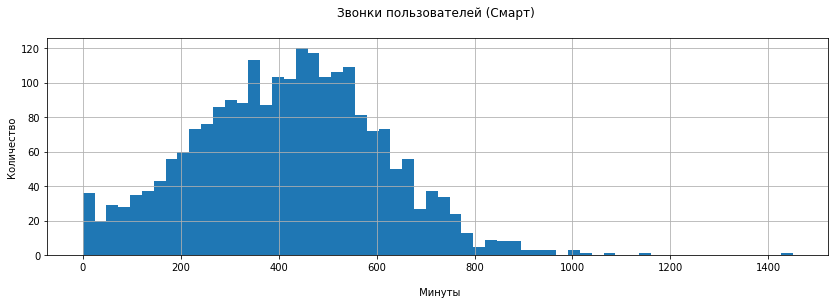

In [103]:
df_smart.hist('sum_call_minute', bins=60, range=(0, 1450), figsize=(14,4)) # строим гистограмму по звонкам пользователей тарифа Смарт
plt.xlabel('\n Минуты')
plt.ylabel('Количество')
plt.title('Звонки пользователей (Смарт) \n')
plt.show()

Распределение длительности звонков похоже на нормальное. Также видно, что есть особо редкие звонки которые превышают 1000 минут в месяц и есть много значений на 0 минут - это пропущенные звонки, так что этот 'мини пик' в области 0 минут вполне нормален.

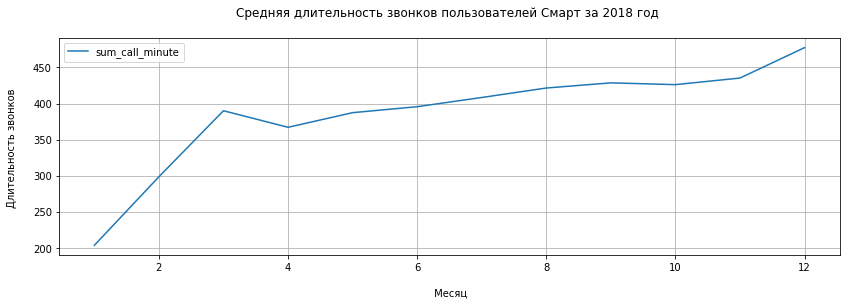

In [106]:
df_smart.pivot_table(index='month', values='sum_call_minute', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график средней продолжительности звонков по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Длительность звонков \n')
plt.title('Средняя длительность звонков пользователей Смарт за 2018 год \n')
plt.show()

Видим что в начале года было не очень большая длительность звонков, но постепенно в течении всего года средняя длительность звонков увеличивалась, пик длительности звонков приходится на декабрь. Возможно, этот пик связан с тем, что перед новым годом совершается большое количество звонков своим близким и родственникам. 

**Смс сообщения пользователей Смарт**

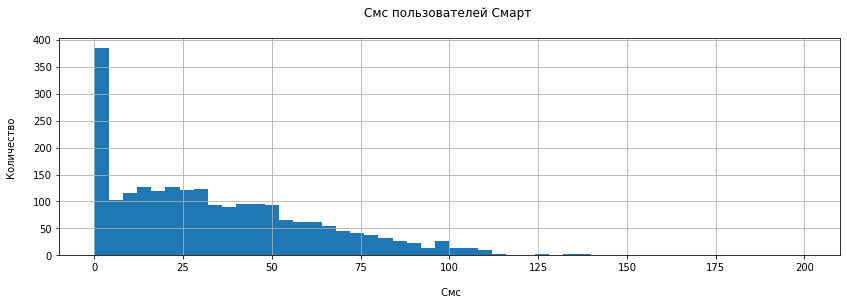

In [108]:
df_smart.hist('sum_messages', bins=50, range=(0,200), figsize=(14,4)) # строим гистограмму по смс пользователей тарифа Смарт
plt.xlabel('\n Смс')
plt.ylabel('Количество \n')
plt.title('Смс пользователей Смарт \n')
plt.show()

В последнее время мессенджеры сменили классические смски поэтому видим огромный пик около 0, но есть и любители смс, среднее колличество отправленных смс около 33.

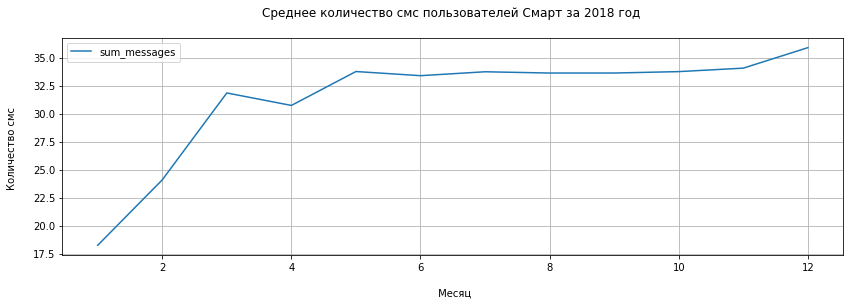

In [110]:
df_smart.pivot_table(index='month', values='sum_messages', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график среднего количества смс по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Количество смс \n')
plt.title('Среднее количество смс пользователей Смарт за 2018 год \n')
plt.show()

Здесь мы видим такую же историю как со звонками, среднее количество отправленных смс сообщений на протяжении всего года растет и имеет пик в декабре.

**Интернет трафик пользователей Смарт**

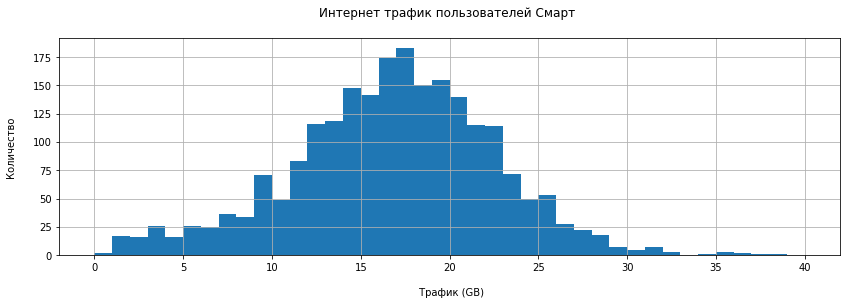

In [111]:
df_smart.hist('sum_gb_used', bins=40, range=(0,40), figsize=(14,4)) # строим гистограмму по инет-трафику пользователей тарифа Смарт
plt.xlabel('\n Трафик (GB)')
plt.ylabel('Количество \n')
plt.title('Интернет трафик пользователей Смарт \n')
plt.show()

Распределение инет-трафика похоже на нормальное. В среднем пользователи тарифа Смарт используют около 17 гб трафика также мы видим, как пользователи мало используют интернет трафик от 0 до 7 гб или очень много, например от 30 гб.

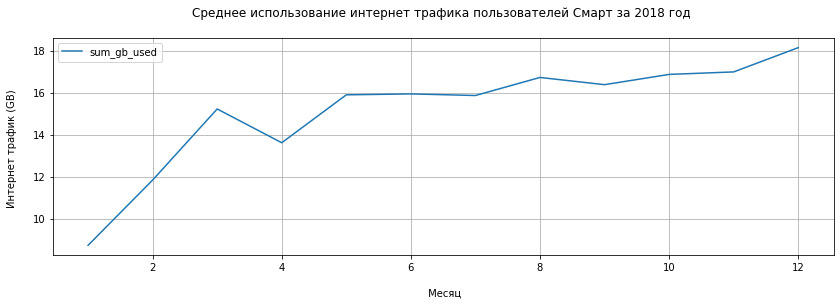

In [112]:
df_smart.pivot_table(index='month', values='sum_gb_used', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график среднего использования инет-трафика по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Интернет трафик (GB) \n')
plt.title('Среднее использование интернет трафика пользователей Смарт за 2018 год \n')
plt.show()

И тут мы видим ту же тенденцию, что и ранее. В течении года пользователи наращивали потребление инет-трафика пик приходится на декабрь месяц.

Далее мы рассмотрим информацию о звонках, смс и интернете пользователей тарифа Ультра.

**Ультра**

Сделаем таблицу с данными где пользователь использует тариф Ультра.

In [57]:
df_ultra = total_df.query('tariff_name == "ultra"') # выделяем пользователей тарифа Ультра

In [58]:
df_ultra['tariff_name'].value_counts() # подсчет тарифов в df_ultra

ultra    986
Name: tariff_name, dtype: int64

Посмотрим на количество пользователей тарифа Ультра.

In [59]:
len(df_ultra['user_id'].unique()) # смотрим длинну df_ultra

149

149 человек пользуются тарифом Ультра.

In [60]:
df_ultra.describe()

,user_id,month,count_call,sum_call_minute,count_inet_used,sum_mb_used,sum_messages,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sum_gb_used,sum_gb_included,revenue_per_month
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.00000,986.0,986.000000
mean,1262.957404,8.254564,73.337728,526.219067,38.409736,19453.889452,49.332657,46.838742,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,19.48073,30.0,2070.030426
std,140.689268,2.872786,43.928721,317.698568,19.627456,10092.233681,47.789969,17.099807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.85788,0.0,376.015578
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.00000,30.0,1950.000000
25%,1143.000000,6.000000,41.000000,282.500000,24.000000,11748.250000,6.000000,30.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,12.00000,30.0,1950.000000
50%,1277.000000,9.000000,73.500000,518.000000,38.000000,19304.000000,38.000000,45.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,19.00000,30.0,1950.000000
75%,1381.000000,11.000000,103.750000,751.750000,52.000000,26835.250000,78.750000,63.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,27.00000,30.0,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,97.000000,49745.000000,224.000000,75.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,49.00000,30.0,4800.000000


В среднем пользователи тарифа Ультра пользовались услугами компании 8 месяцев, совершали около 73 звонков в месяц тратя на это примерно 526 минут в месяц, пользовались интернетом и отправляли смс сообщения, тратя при этом в среднем 2070 рублей в месяц.

Рассмотрим основные показатели по смс, звонках, и интернет трафике тарифа Ультра.

**Звонки по тарифу Ультра:**

Среднее: 526.21 минут в месяц.

Стандартное отклонение: 317.69 минут в месяц.

**СМС по тарифу Ультра:**

Среднее: 49.33 смс в месяц.

Стандартное отклонение: 47.78 смс в месяц.

**Интернет трафик по тарифу Ультра:**

Среднее: 19.48 gb трафик в месяц.

Стандартное отклонение: 9.85 трафик в месяц.

**Рассмотрим дисперсии по тарифу Ультра**

In [61]:
variance_call_ultra = np.var(df_ultra['sum_call_minute'], ddof=1)
print('Дисперсия длительности звонков в месяц:', variance_call_ultra)

Дисперсия длительности звонков в месяц: 100932.38038735186


In [62]:
variance_messages_ultra = np.var(df_ultra['sum_messages'], ddof=1)
print('Дисперсия количества смс в месяц:', variance_messages_ultra)

Дисперсия количества смс в месяц: 2283.8811050133345


In [63]:
variance_inet_ultra = np.var(df_ultra['sum_gb_used'], ddof=1)
print('Дисперсия интернет трафика в месяц:', variance_inet_ultra)

Дисперсия интернет трафика в месяц: 97.17780088755265


Теперь можем строить гистограммы по тарифу Ультра.

**Гистограмма звонков пользователей Ультра**

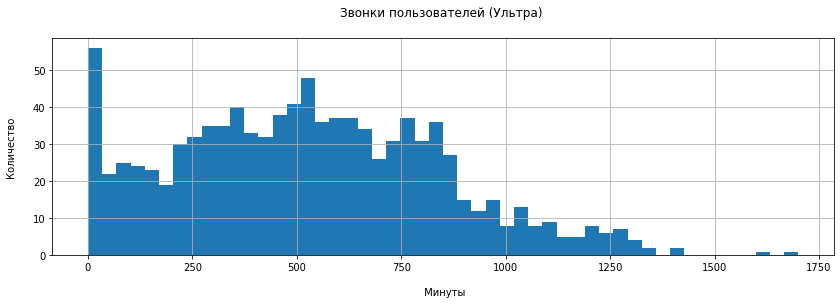

In [113]:
df_ultra.hist('sum_call_minute', bins=50, range=(0, 1700), figsize=(14,4)) # строим гистограмму по звонкам пользователей тарифа Ультра
plt.xlabel('\n Минуты')
plt.ylabel('Количество \n')
plt.title('Звонки пользователей (Ультра) \n')
plt.show()

На гистограмме видно, что есть особо редкие звонки которые превышают 1300 минут в месяц и есть много значений на 0 минут - это пропущенные звонки, в среднем пользователи тарифа Ультра тратят на звонки 530 минут.

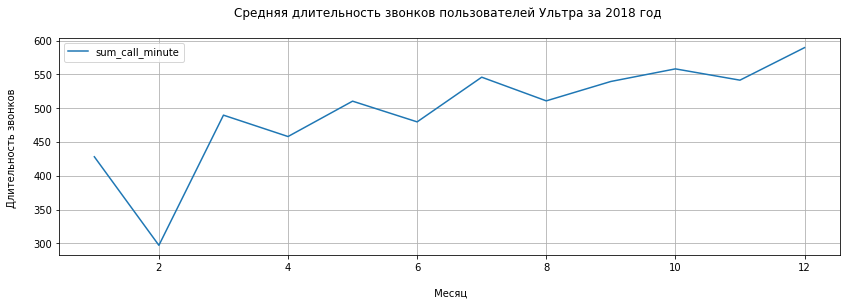

In [114]:
df_ultra.pivot_table(index='month', values='sum_call_minute', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график средней продолжительности звонков по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Длительность звонков \n')
plt.title('Средняя длительность звонков пользователей Ультра за 2018 год \n')
plt.show()

В течении года так же наблюдается увеличение средней длительности звонков, но после январских празников мы видим, спад длительности звонков в феврале среднее значение длительности звонков пользователей тарифа Ультра составляет 300 минут. Декабрь стал самым разговорным месяцем - 630 минут.

**Смс сообщения пользователей Ультра**

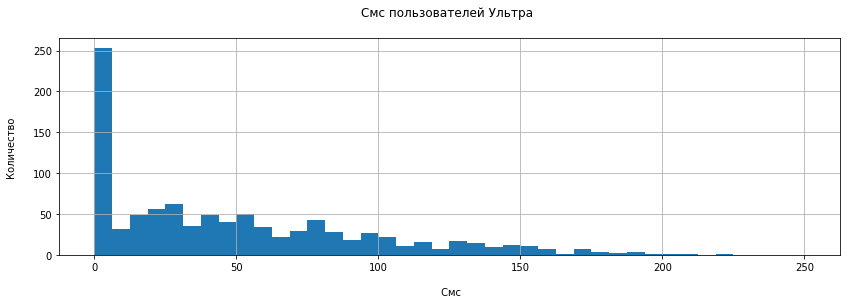

In [115]:
df_ultra.hist('sum_messages', bins=40, range=(0,250), figsize=(14,4)) # строим гистограмму по смс пользователей тарифа Ультра
plt.xlabel('\n Смс')
plt.ylabel('Количество \n')
plt.title('Смс пользователей Ультра \n')
plt.show()

Классический пик на 0, пользователи тарифа Ультра неохотно пользуются смс сообщениями, но есть и огромные значения более 150 сообщений.

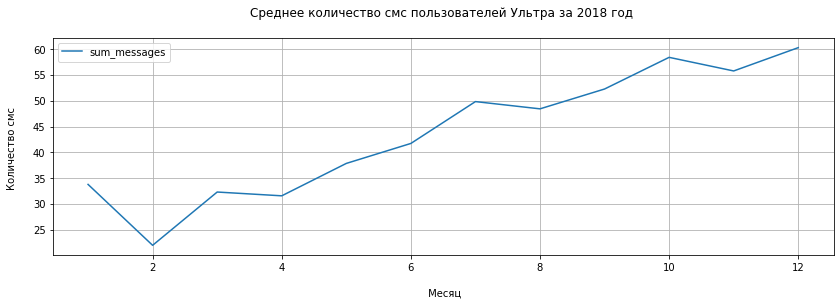

In [116]:
df_ultra.pivot_table(index='month', values='sum_messages', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график среднего количества смс по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Количество смс \n')
plt.title('Среднее количество смс пользователей Ультра за 2018 год \n')
plt.show()

Как и со звонками в смс похожая ситуация. Февраль опять оказался с самым малым значением, отправленных в среднем смс сообщений около 23 сообщений, декабрь на пике более 60 сообщений.

**Интернет трафик пользователей Ультра**

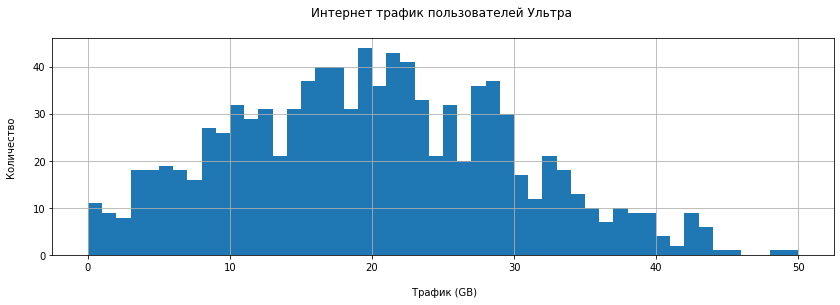

In [118]:
df_ultra.hist('sum_gb_used', bins=50, range=(0,50), figsize=(14,4)) # строим гистограмму по инет-трафику пользователей тарифа Ультра
plt.xlabel('\n Трафик (GB)')
plt.ylabel('Количество \n')
plt.title('Интернет трафик пользователей Ультра \n')
plt.show()

Распределение похоже на нормальное. Есть пользователи которые совсем не пользуются интернетом, в среднем пользователи тарифа Ультра использовали около 20 гб трафика.

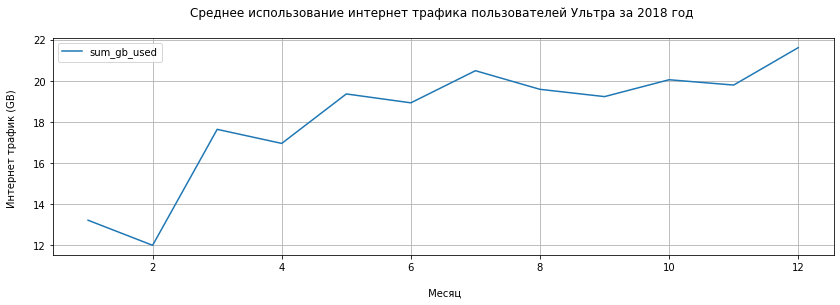

In [119]:
df_ultra.pivot_table(index='month', values='sum_gb_used', aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график среднего использования инет-трафика по месяцам 
plt.xlabel('\n Месяц')
plt.ylabel('Интернет трафик (GB) \n')
plt.title('Среднее использование интернет трафика пользователей Ультра за 2018 год \n')
plt.show()

И трафик пользователей тарифа Ультра растет ближе к концу года. Пик также приходится на декабрь.

**Посмотрим потребление услуг в разных возрастных категориях и на отток клиентов по месяцам**

Выделим две группы: молодые до 39 лет и взрослые от 39 лет, посмотрим есть ли разница в потреблении между этими группами.

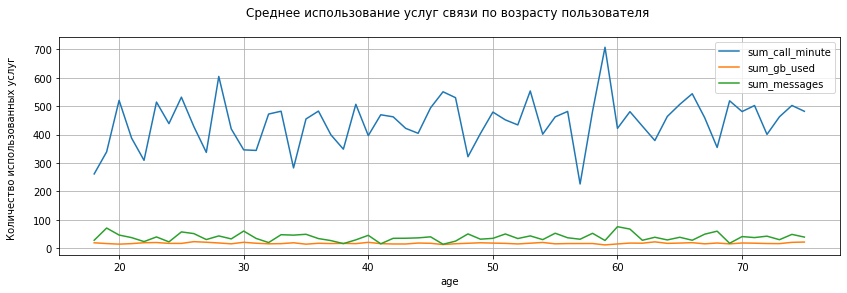

In [120]:
total_df.pivot_table(index='age', values=['sum_call_minute','sum_messages','sum_gb_used'], aggfunc='mean').plot(grid=True, figsize=(14,4)) # Строим график среднего использования инет-трафика по месяцам 
plt.ylabel('Количество использованных услуг \n')
plt.title('Среднее использование услуг связи по возрасту пользователя \n')
plt.show()

Посмотрим конкретные цифры по пользователям:

**Звонки**

In [71]:
print('В среднем пользователи до 39 лет используют:', total_df.query('age < 39')['sum_call_minute'].mean().round(), 'минуты для разговора в месяц')
print('В среднем пользователи от 39 лет используют:', total_df.query('age >= 39')['sum_call_minute'].mean().round(), 'минуты для разговора в месяц')

В среднем пользователи до 39 лет используют: 423.0 минуты для разговора в месяц
В среднем пользователи от 39 лет используют: 466.0 минуты для разговора в месяц


**Смс**

In [72]:
print('В среднем пользователи до 39 лет отправляют:', total_df.query('age < 39')['sum_messages'].mean().round(), 'смс сообщений в месяц')
print('В среднем пользователи от 39 лет отправляют:', total_df.query('age >= 39')['sum_messages'].mean().round(), 'смс сообщений в месяц')

В среднем пользователи до 39 лет отправляют: 39.0 смс сообщений в месяц
В среднем пользователи от 39 лет отправляют: 38.0 смс сообщений в месяц


**Интернет**

In [73]:
print('В среднем пользователи до 39 лет используют:', total_df.query('age < 39')['sum_gb_used'].mean().round(), 'гб интернет-трафика в месяц')
print('В среднем пользователи от 39 лет используют:', total_df.query('age >= 39')['sum_gb_used'].mean().round(), 'гб интернет-трафика в месяц')

В среднем пользователи до 39 лет используют: 18.0 гб интернет-трафика в месяц
В среднем пользователи от 39 лет используют: 17.0 гб интернет-трафика в месяц


Можно отметить характерное отличие в количестве телефонных разговоров: клиенты до 39 лет в среднем на 43 минуты меньше разговаривают по телефону, чем клиенты старшего возраста. Что касается Смс сообщений и интернета, то мы видим, что значения практически совпадают. 

Далее рассмотрим динамику оттока пользователей компании по месяцам.

In [121]:
print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.:')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.:


,churn_date
tariff,
smart,22
ultra,13


По представленным результатам видно, что существует тенденция к росту оттока числа пользователей компании. 

**Вывод:**

В данном этапе мы анализировали действия пользователей двух тарифов. Пользователей тарифа Смарт 351 человек, а тарифа Ультра 149 человек. Также мы построили необходимые гистограммы по смс, звонкам и интеренет трафике, рассмотрели в динамеке средние показатели использования услуг пользователями двух тарифов и увидели, что в основном на протяжении всего года по всем направлениям идет рост, декабрь самый "жирный" месяц. Также мы изучили использование услуг по разным возрастным категориям, построили графики и сделали выводы, плюсом рассмотрели важную метрику оттока пользователей, по ней также были сделаны выводы.

## Шаг 7. Проверка гипотез

На данном этапе необходимо проверить две гипотезы:

* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Проверка гипотезы о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**

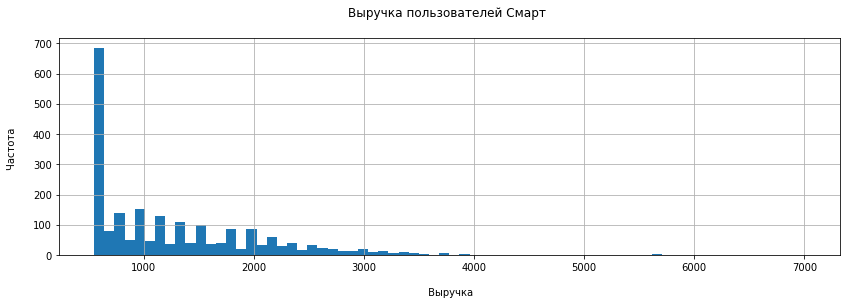

In [122]:
df_smart.hist('revenue_per_month', bins=70, range=(550, 7000), figsize=(14,4)) # строим гистограмму по выручке тариф Смарт
plt.xlabel('\n Выручка')
plt.ylabel('Частота \n')
plt.title('Выручка пользователей Смарт \n')
plt.show()

Посмотрим на среднее значение выручки с пользователей тарифа Смарт:

In [77]:
print('Средняя выручка тарифа Смарт:', df_smart['revenue_per_month'].mean().round(2)) # вывод среднего показателя выручки по тарифу Смарт

Средняя выручка тарифа Смарт: 1289.64


Средняя выручка от пользователей тарифа Смарт больше чем сама плата за использование самого тарифа, это говорит о том, что пользователям не хватает тех планов услуг, которые включены в тариф.

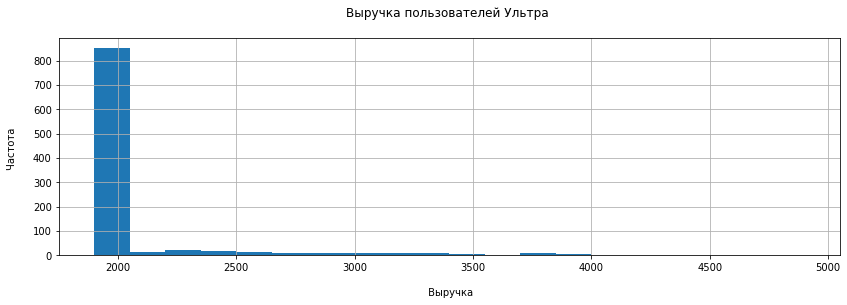

In [123]:
df_ultra.hist('revenue_per_month', bins=20, range=(1900, 4900), figsize=(14,4)) # строим гистограмму по выручке тариф Ультра
plt.xlabel('\n Выручка')
plt.ylabel('Частота \n')
plt.title('Выручка пользователей Ультра \n')
plt.show()

Посмотрим на среднее значение выручки с пользователей тарифа Ультра:

In [79]:
print('Средняя выручка тарифа Ультра:', df_ultra['revenue_per_month'].mean().round(2)) # вывод среднего показателя выручки по тарифу Ультра

Средняя выручка тарифа Ультра: 2070.03


Средняя выручка тарифа Ультра составила 2070.03 рублей, это на 120.03 рублей больше чем ежемесячная плата за пользование тарифом Ультра.

**Формулировка гипотез:**

* H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;
* H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [80]:
sample_1 = df_smart['revenue_per_month']
sample_2 = df_ultra['revenue_per_month']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается')
else:
    print('Не отвергаем нулевую гипотезу, о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается')

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу, о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается


После расчетов мы отвергаем нулевую гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается.

In [81]:
print('Выручка с тарифа Смарт:', df_smart['revenue_per_month'].sum(), 'рублей.')
print('Выручка с тарифа Ультра:', df_ultra['revenue_per_month'].sum(), 'рублей.')

Выручка с тарифа Смарт: 2875901 рублей.
Выручка с тарифа Ультра: 2041050 рублей.


Выручка с тарифа Смарт больше чем выручка с тарифа Ультра, это связанно с тем, что пользователей тарифа Смарт гораздо больше.

**Проверка гипотезы о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Поделим пользователей на тех, кто из Москвы и тех, кто в остальных городах.

In [82]:
df_moscow = total_df.query('city == "Москва"') # выделяем Москву из total_df
df_regions = total_df.query('city != "Москва"') # выделяем регионы из total_df

In [83]:
df_moscow['city'].value_counts() # проверяем города

Москва    611
Name: city, dtype: int64

In [84]:
df_regions['city'].value_counts() # проверяем города

Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
Ульяновск           83
                  ... 
Сургут               6
Нижневартовск        6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 75, dtype: int64

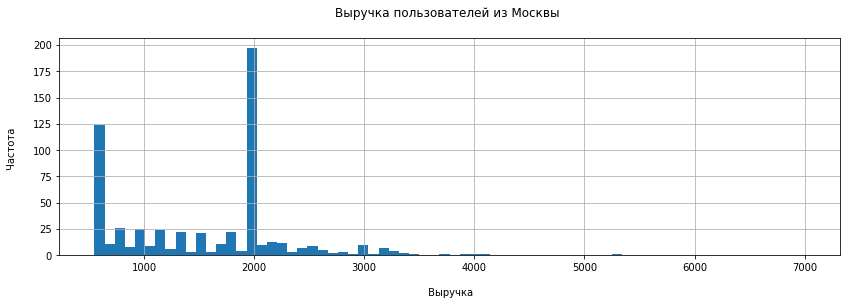

In [125]:
df_moscow.hist('revenue_per_month', bins=70, range=(550, 7000), figsize=(14,4)) # строим гистограмму по выручке пользователей из Москвы
plt.xlabel('\n Выручка')
plt.ylabel('Частота \n')
plt.title('Выручка пользователей из Москвы \n')
plt.show()

Посмотрим на среднее значение выручки с пользователей из Москвы:

In [86]:
print('Средняя выручка от пользователей из Москвы:', df_moscow['revenue_per_month'].mean().round(2)) # вывод среднего показателя выручки пользователей из Москвы

Средняя выручка от пользователей из Москвы: 1546.71


Следующим шагом мы посмотрим на выручку регионов.

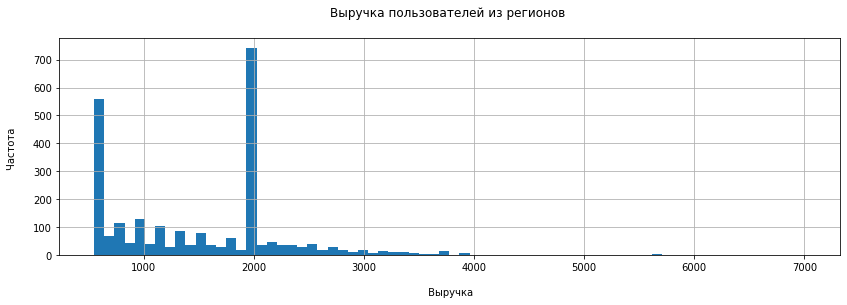

In [127]:
df_regions.hist('revenue_per_month', bins=70, range=(550, 7000), figsize=(14,4)) # строим гистограмму по выручке пользователей из регионов
plt.xlabel('\n Выручка')
plt.ylabel('Частота \n')
plt.title('Выручка пользователей из регионов \n')
plt.show()

Посмотрим на среднее значение выручки с пользователей из регионов:

In [88]:
print('Средняя выручка от пользователей из регионов:', df_regions['revenue_per_month'].mean().round(2)) # вывод среднего показателя выручки пользователей из регионов

Средняя выручка от пользователей из регионов: 1524.73


**Формулировка гипотез:**

* H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
* H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [89]:
sample_1 = df_moscow['revenue_per_month']
sample_2 = df_regions['revenue_per_month']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов')
else:
    print('Не отвергаем нулевую гипотезу, о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов')

p-значение:  0.5216952110000279
Не отвергаем нулевую гипотезу, о том, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов


**Интерпретация результата:**
- p-значение равное 0.521695211 говорит нам о том, что хотя средняя выручка пользователей из Москвы и других региогнов не равна, с вероятностью 52%, такое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о различии между средней выручкой пользователей из Москвы и других регионов.


**Вывод:**

На данном этапе мы рассмотрели выручку с двух тарифов, сравнили их между собой, также мы рассмотрели разницу в выручке среди Москвы и других городов, сформулировали основные и альтернативные гипотезы и проверили их.

# Общий вывод

В данном проекте было исследование перспективности двух тарифов. Нам было представлено 5 таблиц из которой мы сделали одну со всем необходимым для анализа, далее мы поработали с самим качеством данных изменили типы данных и заполнили пропуски. 

В ходе работы в данные была добавлена информация об интернет трафике пользователей, добавленные столбцы были необходимы для расчета выручки с каждого пользователя. Далее мы использовали написанную нами функцию для расчета выручки и посмотрели на ее работу, этот этап прошел успешно, функция сработала и в данных не было пропусков. 

Далее мы анализировали информацию по звонкам, смс и интернет трафике пользователей разных тарифов разделив их на пользователей тарифа Смарт: 351 человек и Ультра: 149 человек, построили гистограммы и посмотрели на действия пользователей в динамеке на протяжении года, в ходе анализа мы выявили, что в декабре пользователи проявили самую высокую активность. 

Окончательным этапом проекта была проверка гипотез, составление нулевой и альтернативной гипотез, в ходе расчетов была отвергнута гипотиза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, а также после проверки мы можем предполагать, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Пользователи тарифа Смарт в среднем меньше пользуются услугами компании, чем пользователи тарифа Ультра, по расчетам можно сказать, что обычному пользователю тарифа Смарт не хватает интернет трафика, в среднем этот пользователь использует 17 гб трафика, но включено всего лишь 15 гб, из-за этого пользователь переплачивает 200 рублей за каждый использованный гб.
Если говорить о среднестатистическом пользователе тарифа Ультра, то мы можем сказать что ему хватает всего пакета услуг и он не переплачивает за сверхпотребление.

Средняя выручка от пользователей тарифа Смарт больше чем сама плата за использование самого тарифа, это говорит о том, что пользователям не хватает тех планов услуг, которые включены в тариф. Средняя выручка с пользователей тарифа Смарт 1289.64 и она  больше абонентской платы на 739,64 рубля. При тарифе Ультра разница между абонентской платой и средней выручкой составила 120.03 рублей. 

Выручка с тарифа Смарт составила: 2 875 901 рублей, а выручка с тарифа Ультра: 2 041 050 рублей, разница между тарифами в абсолютном выражении составила: 834 851 рублей. При равном количестве пользователей двух тарифов выручка с тарифа Ультра была бы намного больше, чем с тарифа Смарт, поэтому бизнесу важно продвигать тариф Ультра.  

Также было проанализировано поведение клиентов, а точнее их отток из компании, к концу 2018 года наблюдалась тенденция к оттоку пользователей Мегалайна, что является достаточно неприятным моментом для компании, за анализируемый период Мегалайн покинуло 38 пользователей, но 35 пользователей перестали пользоваться услугами за очень короткое время ( последние 4 месяца 2018 года ). За эти четыре месяца чаще уходили клиенты которые были пользователями тарифа Cмарт - 22 пользователя, клиенты Ультра переставали пользоваться услугами связи реже - 13 пользователей прекратили использовать тариф Ультра за последние 4 месяца. Помимо этого было проанализировано использование услуг связи клиентами разного возраста, при данном анализе нам удалось сделать вывод что люди моложе 39 лет значительно реже пользуются звонками по мобильной связи, что касается импользования смс сообщений и интернет-трафика, то результат оказался неожиданным, две категории пользователей практически одинаково используют данные услуги.